Business Task : Increase annual member subscription in bike share service.


Goal : Help marketing team to find what is different between annual member and casual rider. For make marketing campaign. 

Data Used : 6 month of trip data (May 2022 - Oct 2022)

In [1]:
import pandas as pd
from zipfile import ZipFile, Path

In [2]:
# Import raw data 
with ZipFile("rawfile/202205-divvy-tripdata.zip") as myzip1:
    data1 = myzip1.open("202205-divvy-tripdata.csv")
tripdata_202205 = pd.read_csv(data1)

with ZipFile("rawfile/202206-divvy-tripdata.zip") as myzip2:
    data2 = myzip2.open("202206-divvy-tripdata.csv")
tripdata_202206 = pd.read_csv(data2)

with ZipFile("rawfile/202207-divvy-tripdata.zip") as myzip3:
    data3 = myzip3.open("202207-divvy-tripdata.csv")
tripdata_202207 = pd.read_csv(data3)

with ZipFile("rawfile/202208-divvy-tripdata.zip") as myzip4:
    data4 = myzip4.open("202208-divvy-tripdata.csv")
tripdata_202208 = pd.read_csv(data4)

with ZipFile("rawfile/202209-divvy-tripdata.zip") as myzip5:
    data5 = myzip5.open("202209-divvy-publictripdata.csv")
tripdata_202209 = pd.read_csv(data5)

with ZipFile("rawfile/202210-divvy-tripdata.zip") as myzip6:
    data6 = myzip6.open("202210-divvy-tripdata.csv")
tripdata_202210 = pd.read_csv(data6)

# Concate all dataframe into single dataframe "tripdata_6m".
tripdata_6m = pd.concat([tripdata_202205,tripdata_202206,tripdata_202207,tripdata_202208,tripdata_202209,tripdata_202210],ignore_index=True)

In [3]:
# Chack Data shape
tripdata_6m.shape

(4273506, 13)

In [4]:
# Review Data
tripdata_6m.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member


In [5]:
tripdata_6m.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Clean Data 

In [6]:
# Check incomplete data
tripdata_6m.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    598851
start_station_id      598851
end_station_name      642598
end_station_id        642598
start_lat                  0
start_lng                  0
end_lat                 4754
end_lng                 4754
member_casual              0
dtype: int64

In [7]:
# Delete all row that incomplete.
tripdata_6m.dropna(inplace = True)
tripdata_6m.shape

(3320314, 13)

In [8]:
# Check incomplete data again
tripdata_6m.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [9]:
# Check duplicate data
tripdata_6m[tripdata_6m.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


duplicate data not found

In [10]:
# Check Outdate data
tripdata_6m.max()

ride_id                  FFFFFCFA2D52CEB7
rideable_type               electric_bike
started_at            2022-10-31 23:59:33
ended_at              2022-11-01 08:59:46
start_station_name         Zapata Academy
start_station_id             chargingstx5
end_station_name           Zapata Academy
end_station_id               chargingstx5
start_lat                       42.064869
start_lng                      -87.525314
end_lat                         42.064854
end_lng                        -87.528232
member_casual                      member
dtype: object

In [11]:
tripdata_6m.min()

ride_id                       00000179CF2C4FB5
rideable_type                     classic_bike
started_at                 2022-05-01 00:00:06
ended_at                   2022-05-01 00:05:17
start_station_name    10101 S Stony Island Ave
start_station_id                        021320
end_station_name      10101 S Stony Island Ave
end_station_id                          021320
start_lat                            41.648501
start_lng                            -87.83332
end_lat                              41.648501
end_lng                                 -87.83
member_casual                           casual
dtype: object

outdate data not found

In [12]:
# Check incorrect data types
tripdata_6m.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [13]:
# Change [started_at, ended_at] data type to datetime64
tripdata_6m['started_at'] = pd.to_datetime(tripdata_6m['started_at'])
tripdata_6m['ended_at'] = pd.to_datetime(tripdata_6m['ended_at'])

Manipulate Data

In [14]:
# Add duration of trip column as 'trip_duration'
tripdata_6m['trip_duration'] = tripdata_6m['ended_at']-tripdata_6m['started_at']

In [15]:
tripdata_6m.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,0 days 00:33:21
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,0 days 00:37:54
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,0 days 00:21:50
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,0 days 00:08:42
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,0 days 00:05:01


In [16]:
tripdata_6m.describe()

,start_lat,start_lng,end_lat,end_lng,trip_duration
count,3.320314e+06,3.320314e+06,3.320314e+06,3.320314e+06,3320314
mean,4.190301e+01,-8.764496e+01,4.190334e+01,-8.764524e+01,0 days 00:17:56.612875469
std,4.226091e-02,2.508588e-02,4.245377e-02,2.530816e-02,0 days 00:38:16.823170700
min,4.164850e+01,-8.783332e+01,4.164850e+01,-8.783000e+01,-1 days +21:11:18
25%,4.188165e+01,-8.765840e+01,4.188189e+01,-8.765862e+01,0 days 00:06:25
50%,4.189859e+01,-8.764195e+01,4.189918e+01,-8.764288e+01,0 days 00:11:16
75%,4.192914e+01,-8.762787e+01,4.192955e+01,-8.762784e+01,0 days 00:20:09
max,4.206487e+01,-8.752531e+01,4.206485e+01,-8.752823e+01,22 days 05:55:27


In [17]:
# delete data that trip_duration < 0
negative_duration = tripdata_6m.index[tripdata_6m.trip_duration<'00:00:00'].tolist()
tripdata_6m.drop(negative_duration,axis=0,inplace = True)

In [18]:
# convert trip_duration to minute and secound
tripdata_6m['trip_duration'] = tripdata_6m['trip_duration'].astype('timedelta64[m]') + (tripdata_6m['trip_duration'].astype('timedelta64[s]') % 60)/60

In [19]:
tripdata_6m.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667


In [20]:
#delete the row that trip duration more than 1500 minutes. (25 hours)
high_duration = tripdata_6m.index[tripdata_6m.trip_duration>1500].tolist()
tripdata_6m.drop(high_duration,axis=0,inplace=True)#tripdata_6m.describe()

In [21]:
#check the row that trip_duration less or equal to 0.
zero_duration = tripdata_6m.index[tripdata_6m.trip_duration<=0].tolist()
#delete the row that trip_duration less or equal to 0.
tripdata_6m.drop(zero_duration,axis=0,inplace=True)

In [22]:
tripdata_6m.shape

(3320078, 14)

Analysis

In [23]:
import matplotlib.pyplot as plt

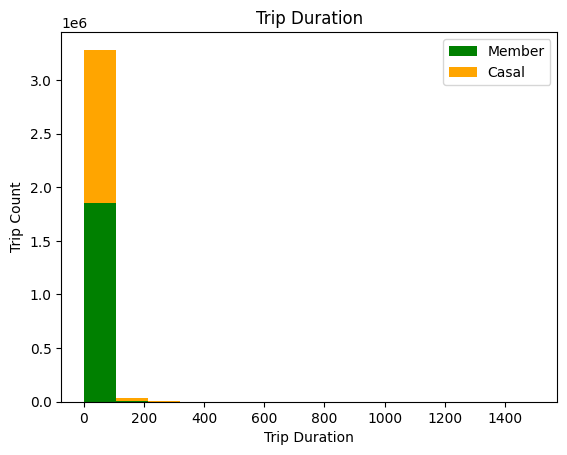

In [24]:
# review data as histrogram
plt.hist([tripdata_6m.trip_duration[tripdata_6m.member_casual=='member'],tripdata_6m.trip_duration[tripdata_6m.member_casual=='casual']],stacked=True,bins=14,color=['green','orange'])
plt.xlabel('Trip Duration')
plt.ylabel('Trip Count')
plt.title('Trip Duration')
plt.legend(['Member','Casal'])

From histogram 99% of data is inrange of 0 to 300mins 
>let's focus on trip_duration that's in range of 0 to 300 mins

In [25]:
#make mhigh_duration to collect the index of data thats have trip duration more than 300min.
mhigh_duration = tripdata_6m.index[tripdata_6m.trip_duration>300].tolist()
#delete data that's  trip_duration is more than 300 mins.
tripdata_6m = tripdata_6m.drop(mhigh_duration,axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

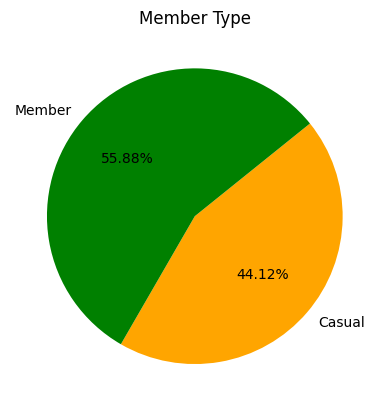

In [26]:
# Check the poportion of annaual member and casual member from pie chart.
plt.pie(
  [tripdata_6m.member_casual[tripdata_6m.member_casual=='casual'].count(),tripdata_6m.member_casual[tripdata_6m.member_casual=='member'].count()],
  labels=['Casual','Member'],
  colors=['orange','green'],
  autopct='%.2f%%',
  startangle=240
  )
plt.title('Member Type')
plt.show

In [27]:
# check the average trip_duration of annual member and casual member.
member_avg_duration = tripdata_6m.trip_duration[tripdata_6m.member_casual=='member'].mean()
print('Member average trip duration = ',member_avg_duration)
casual_avg_duration = tripdata_6m.trip_duration[tripdata_6m.member_casual=='casual'].mean()
print('Casual average trip duration = ',casual_avg_duration)

Member average trip duration =  12.764028451713358
Casual average trip duration =  22.751966668443764


<function matplotlib.pyplot.show(close=None, block=None)>

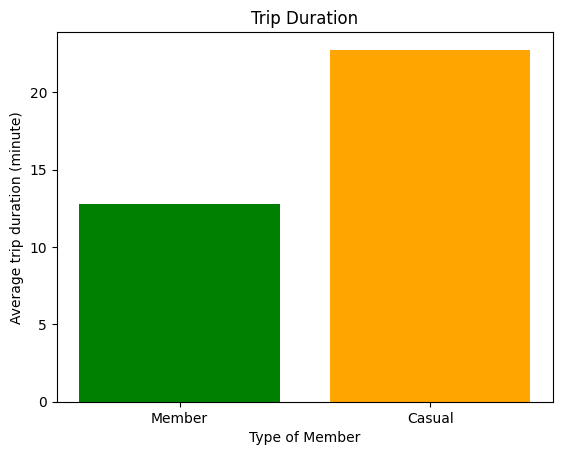

In [28]:
# plot graph member type and Average trip duaration
x = ['Member','Casual']
y = [member_avg_duration,casual_avg_duration]
plt.bar(x,y,color=['green','orange'])
plt.xlabel('Type of Member')
plt.ylabel('Average trip duration (minute)')
plt.title('Trip Duration')
plt.show

First insight : casual rider have higher trip duration more than annual member.

Member average trip duration =  12.76 minute

Casual average trip duration =  22.75 minute

In [29]:
from datetime import datetime as dt

In [30]:
# find the difference trip count in day of week by add day of week column.
tripdata_6m['day_of_week'] = tripdata_6m['started_at'].dt.day_name()
tripdata_6m.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member,33.350000,Monday
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member,37.900000,Wednesday
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882242,-87.641066,41.907655,-87.672552,member,21.833333,Thursday
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882242,-87.641066,41.884576,-87.631890,member,8.700000,Tuesday
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882242,-87.641066,41.885779,-87.651025,member,5.016667,Tuesday


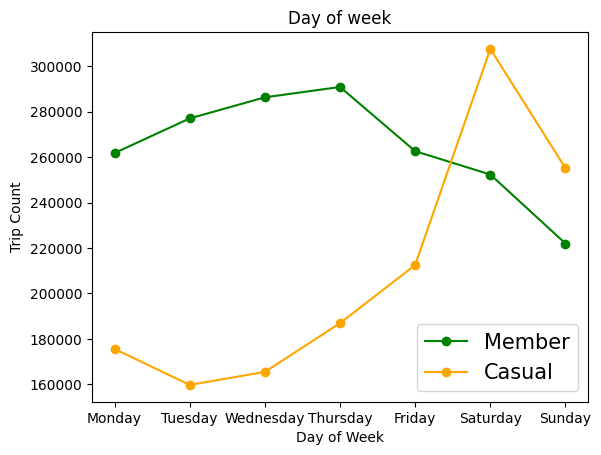

In [31]:
# count member trip and casual trip each day of week
day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count_member = [tripdata_6m.day_of_week.loc[(tripdata_6m.day_of_week==i)&(tripdata_6m.member_casual=='member')].count() for i in day]
count_casual = [tripdata_6m.day_of_week.loc[(tripdata_6m.day_of_week==i)&(tripdata_6m.member_casual=='casual')].count() for i in day]

# plot scatter plot
plt.plot(day,count_member,color='green',marker='o')
plt.plot(day,count_casual,color='orange',marker='o')
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title('Day of week')
plt.legend(["Member",'Casual'],fontsize=15) 

Second insight : casual member frequenzy use bike share in weekend, but annual memeber frequenzy use in working day.

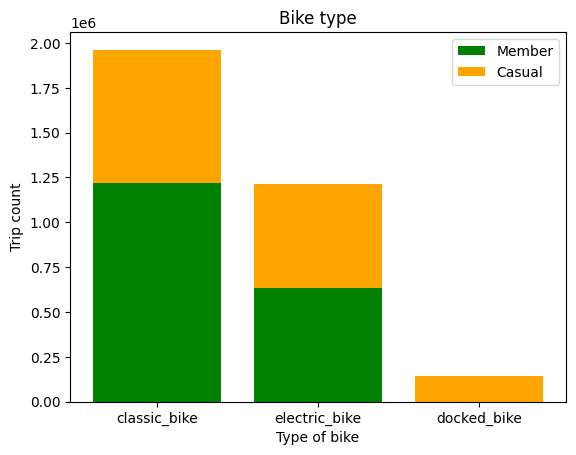

In [32]:
# how the bike type affect on type of member.
bike_type = ['classic_bike', 'electric_bike', 'docked_bike']
type_count_member = [tripdata_6m.rideable_type.loc[(tripdata_6m.rideable_type==i)&(tripdata_6m.member_casual=='member')].count() for i in bike_type]
type_count_casual = [tripdata_6m.rideable_type.loc[(tripdata_6m.rideable_type==i)&(tripdata_6m.member_casual=='casual')].count() for i in bike_type]

# plot barchart
plt.bar(bike_type,type_count_member,color = 'green')
plt.bar(bike_type,type_count_casual,bottom =type_count_member,color = 'orange')
plt.xlabel('Type of bike')
plt.ylabel('Trip count')
plt.title('Bike type')
plt.legend(['Member','Casual'])

Trird insight : Casual member use docked bike but member didn't use.

In [33]:
#tripdata_6m.to_csv("tripdata_6month.csv",header = True,index = False)